In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

dataframe = pd.read_csv("scottish_hills.csv")

x = dataframe.Height
y = dataframe.Latitude

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")   # I've added a color argument here

#plt.savefig("figure.png")
# Or you can use plt.show()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

dataframe = pd.read_csv("scottish_hills.csv")

x = dataframe.Height
y = dataframe.Latitude

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("Height (m)", fontsize=20)
plt.ylabel("Latitude", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig("python-linear-reg-custom.png")
plt.show()

In [ ]:
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.feature as cfeature

plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')

ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

ax.set_yticks([56,57,58,59], crs=ccrs.PlateCarree())
ax.set_xticks([-8, -6, -4, -2], crs=ccrs.PlateCarree())

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-8, -1.5, 55.3, 59])

plt.scatter(dataframe['Longitude'],dataframe['Latitude'],
                    color='red', marker='^', transform=ccrs.PlateCarree())
plt.savefig("munros.png")

In [ ]:
conda install -c conda-forge cartopy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

#load the csv dataset
#car = pd.read_csv('scottish_hills.csv')
car = pd.read_csv('euromillions-draw-history.csv')

In [35]:
#Display the head of the dataset
car.head()

,DrawDate,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Lucky Star 1,Lucky Star 2,UK Millionaire Maker,DrawNumber
0,13-Sep-2022,9,12,15,40,47,1,11,VFKF36212,1563
1,09-Sep-2022,17,23,24,26,27,4,9,TDJL68325,1562
2,06-Sep-2022,7,10,22,29,44,4,5,XCJH16417,1561
3,02-Sep-2022,7,12,13,20,45,3,12,HBJD99886,1560
4,30-Aug-2022,4,6,10,15,19,1,4,JZHC39437,1559


In [ ]:
#Display the bottom 5 rows
car.tail(5)

In [30]:
#Analytical summary of the dataset
car.describe(include='all')

,DrawDate,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Lucky Star 1,Lucky Star 2,UK Millionaire Maker,DrawNumber
count,51,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51,51.000000
unique,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,NaN
top,13-Sep-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VFKF36212,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,NaN,8.725490,17.607843,24.764706,34.078431,42.686275,4.509804,9.333333,NaN,1538.000000
std,NaN,6.254849,7.429881,7.254208,7.662488,7.109121,2.468786,2.346629,NaN,14.866069
min,NaN,1.000000,5.000000,10.000000,15.000000,19.000000,1.000000,3.000000,NaN,1513.000000
25%,NaN,3.500000,11.000000,20.500000,28.500000,39.500000,3.000000,8.000000,NaN,1525.500000
50%,NaN,7.000000,17.000000,25.000000,34.000000,45.000000,4.000000,10.000000,NaN,1538.000000
75%,NaN,11.000000,23.000000,29.000000,39.500000,48.000000,6.000000,11.000000,NaN,1550.500000


array([[<AxesSubplot:title={'center':'Ball 1'}>,
        <AxesSubplot:title={'center':'Ball 2'}>,
        <AxesSubplot:title={'center':'Ball 3'}>],
       [<AxesSubplot:title={'center':'Ball 4'}>,
        <AxesSubplot:title={'center':'Ball 5'}>,
        <AxesSubplot:title={'center':'Lucky Star 1'}>],
       [<AxesSubplot:title={'center':'Lucky Star 2'}>,
        <AxesSubplot:title={'center':'DrawNumber'}>, <AxesSubplot:>]],
      dtype=object)

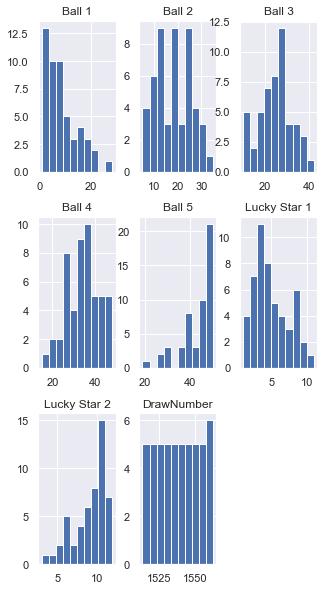

In [33]:
#Plot a histogram for all the variables
car.hist(figsize=(5,10))

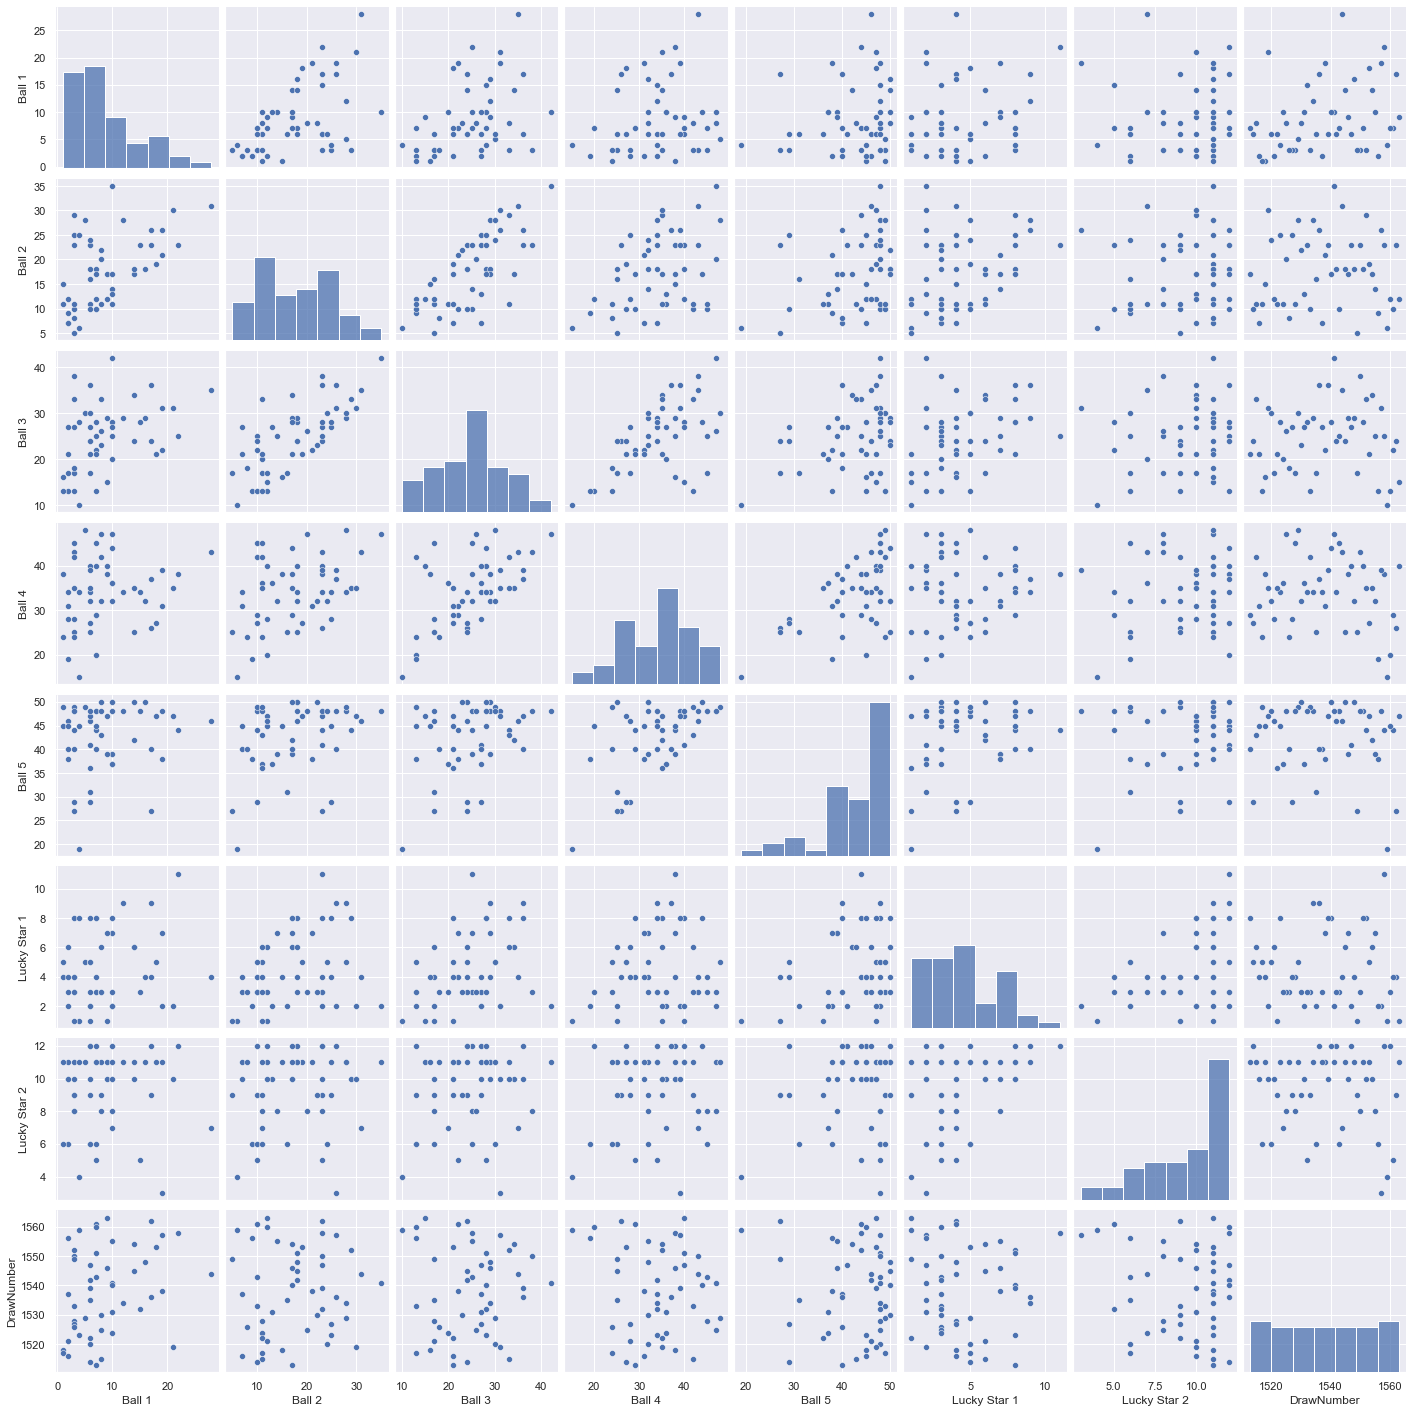

In [34]:
sns.pairplot(car)

In [ ]:
#Rows containing duplicate daat
duplicate_rows_car = car[car.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_car.shape)

In [ ]:
country_data = car["Ball 1"]
medal_data = car["Ball 2"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Gold medal achievements of five most successful\n"+"countries in 2016 Summer Olympics")
plt.show()